# Notebook 1 : Exploring the datas

Link to the dataset we are using : https://www.kaggle.com/datasets/athu1105/book-genre-prediction/data

Classification of books thanks to their summary. 

In [1]:
import numpy as np
import pandas as pd 
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

## Information about the dataset

- Load the data 
- Printing the head of a dataset

In [2]:
df = pd.read_csv("data.csv", index_col = 'index')
df.head()

,title,genre,summary
index,,,
0,Drowned Wednesday,fantasy,Drowned Wednesday is the first Trustee among ...
1,The Lost Hero,fantasy,"As the book opens, Jason awakens on a school ..."
2,The Eyes of the Overworld,fantasy,Cugel is easily persuaded by the merchant Fia...
3,Magic's Promise,fantasy,The book opens with Herald-Mage Vanyel return...
4,Taran Wanderer,fantasy,Taran and Gurgi have returned to Caer Dallben...


#### Checking the shape of the data and if it containes null values

In [3]:
print(f"Shape: {df.shape}")

Shape: (4657, 3)


In [4]:
df.isnull().sum()

title      0
genre      0
summary    0
dtype: int64

No NaN values so we don't need to drop lines of the dataset.

## Exploring the data

We want to see the repartition of the classes.

Having imbalanced class have a huge impact on the results and the model we will choose. 

In [5]:
px.histogram(df , df['genre'])

## Checking if certain genre summary are notably longer than other

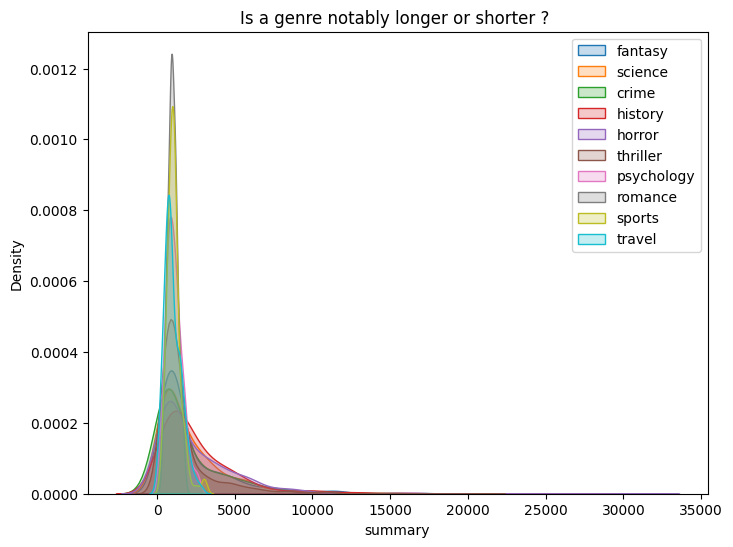

In [6]:
class_labels = ['fantasy', 'science', 'crime', 'history', 'horror', 'thriller', 'psychology', 'romance', 'sports', 'travel']

plt.figure(figsize=(8,6))

# use the sns.kdeplot function to visualize text length for each class # https://seaborn.pydata.org/generated/seaborn.kdeplot.html
for label in class_labels:
    sns.kdeplot(df[df['genre'] == label]['summary'].str.len(), fill=True, label=label)
plt.legend()
plt.title("Is a genre notably longer or shorter ? ")
plt.show()

#### Travel and sport have slightly shorter summary than the rest of the genre.

## Preprocessing with a function

Preprocessing the datas, so they are cleaner and easier : 
- Lowercasing everything
- Removing stop words
- Tokenizing with 10000
- Using a lemmatizer/stemmer

In [7]:
from preprocessing import preprocess_text

The function for preprocessing is in the preprocessing.py

In [8]:
df['processed'] = df['summary'].apply(preprocess_text) 

In [9]:
display(df.head())

,title,genre,summary,processed
index,,,,
0,Drowned Wednesday,fantasy,Drowned Wednesday is the first Trustee among ...,drowned wednesday first trustee among morrow d...
1,The Lost Hero,fantasy,"As the book opens, Jason awakens on a school ...",book open jason awakens school bus unable reme...
2,The Eyes of the Overworld,fantasy,Cugel is easily persuaded by the merchant Fia...,cugel easily persuaded merchant fianosther att...
3,Magic's Promise,fantasy,The book opens with Herald-Mage Vanyel return...,book open vanyel returning country valdemar ex...
4,Taran Wanderer,fantasy,Taran and Gurgi have returned to Caer Dallben...,taran gurgi returned caer dallben following ev...


## Analysis of most common words

Removing topwords is a first step but we need to remove the most frequent words, they appear in every classes so they are irrelevant for training and testing. 

In [10]:
from collections import Counter

In [11]:
join_column = " ".join(df['processed'])
split_column = join_column.split(' ')

cnt = Counter(split_column)
most_common = cnt.most_common()
most_common[:20]

[('one', 5069),
 ('find', 3718),
 ('life', 3162),
 ('time', 3123),
 ('new', 2800),
 ('take', 2688),
 ('two', 2541),
 ('also', 2395),
 ('world', 2317),
 ('year', 2307),
 ('go', 2258),
 ('back', 2207),
 ('book', 2181),
 ('man', 2135),
 ('story', 2096),
 ('first', 2095),
 ('father', 1914),
 ('friend', 1912),
 ('tell', 1880),
 ('make', 1878)]

#### Creating a column without the text words to analyse impact on future results

In [12]:
FREQWORDS = [w for (w, word_count) in most_common[:20]]

def remove_freqwords(text: str, freq_words: list=FREQWORDS) -> str:
    cleaned_text = " ".join([word for word in text.split() if word not in freq_words])
    return cleaned_text

In [13]:
df["text_wo_freq"] = df["processed"].apply(remove_freqwords)

df.head()

,title,genre,summary,processed,text_wo_freq
index,,,,,
0,Drowned Wednesday,fantasy,Drowned Wednesday is the first Trustee among ...,drowned wednesday first trustee among morrow d...,drowned wednesday trustee among morrow day art...
1,The Lost Hero,fantasy,"As the book opens, Jason awakens on a school ...",book open jason awakens school bus unable reme...,open jason awakens school bus unable remember ...
2,The Eyes of the Overworld,fantasy,Cugel is easily persuaded by the merchant Fia...,cugel easily persuaded merchant fianosther att...,cugel easily persuaded merchant fianosther att...
3,Magic's Promise,fantasy,The book opens with Herald-Mage Vanyel return...,book open vanyel returning country valdemar ex...,open vanyel returning country valdemar extensi...
4,Taran Wanderer,fantasy,Taran and Gurgi have returned to Caer Dallben...,taran gurgi returned caer dallben following ev...,taran gurgi returned caer dallben following ev...


## Analysis of the rare words

In the same way as before we don't only want the remove rare words, we want to remove all the words appearing only one time. As they appear only once, they are irrelevant for training and training. 

In [14]:
# Filter out words with a frequency of 1
filtered_words = [word for word, frequency in most_common if frequency == 1]

print(len(filtered_words))

17403


In [15]:
RAREWORDS = [word for word, frequency in most_common if frequency == 1]

def remove_rarewords(text: str, rare_words: list=RAREWORDS) -> str:
    cleaned_text = " ".join([word for word in text.split() if word not in rare_words])
    return cleaned_text

df["text_wo_freq_rare"] = df["text_wo_freq"].apply(remove_rarewords)

df.head()

,title,genre,summary,processed,text_wo_freq,text_wo_freq_rare
index,,,,,,
0,Drowned Wednesday,fantasy,Drowned Wednesday is the first Trustee among ...,drowned wednesday first trustee among morrow d...,drowned wednesday trustee among morrow day art...,drowned wednesday trustee among morrow day art...
1,The Lost Hero,fantasy,"As the book opens, Jason awakens on a school ...",book open jason awakens school bus unable reme...,open jason awakens school bus unable remember ...,open jason awakens school bus unable remember ...
2,The Eyes of the Overworld,fantasy,Cugel is easily persuaded by the merchant Fia...,cugel easily persuaded merchant fianosther att...,cugel easily persuaded merchant fianosther att...,cugel easily persuaded merchant fianosther att...
3,Magic's Promise,fantasy,The book opens with Herald-Mage Vanyel return...,book open vanyel returning country valdemar ex...,open vanyel returning country valdemar extensi...,open vanyel returning country valdemar extensi...
4,Taran Wanderer,fantasy,Taran and Gurgi have returned to Caer Dallben...,taran gurgi returned caer dallben following ev...,taran gurgi returned caer dallben following ev...,taran gurgi returned caer dallben following ev...


## Trying to see if we wand to use stemming or lemmatizing 

In our preprocess function we want to define which one is better, to decide we want the one with the less unique words. 

## Stemming the words

In [16]:
from nltk.stem.porter import PorterStemmer

stemmer = PorterStemmer()

def stem_words(text: str) -> str:

    # return a string where each word has been stemmed
    split = text.split()

    # Apply the stemmer to the words
    stem_words = [stemmer.stem(word) for word in split]

    # Join the stemmes words into a stemmed text
    stem_text = ' '.join(stem_words)

    return stem_text

In [17]:
df["text_stemmed"] = df["text_wo_freq_rare"].apply(stem_words)
df

,title,genre,summary,processed,text_wo_freq,text_wo_freq_rare,text_stemmed
index,,,,,,,
0,Drowned Wednesday,fantasy,Drowned Wednesday is the first Trustee among ...,drowned wednesday first trustee among morrow d...,drowned wednesday trustee among morrow day art...,drowned wednesday trustee among morrow day art...,drown wednesday truste among morrow day arthur...
1,The Lost Hero,fantasy,"As the book opens, Jason awakens on a school ...",book open jason awakens school bus unable reme...,open jason awakens school bus unable remember ...,open jason awakens school bus unable remember ...,open jason awaken school bu unabl rememb anyth...
2,The Eyes of the Overworld,fantasy,Cugel is easily persuaded by the merchant Fia...,cugel easily persuaded merchant fianosther att...,cugel easily persuaded merchant fianosther att...,cugel easily persuaded merchant fianosther att...,cugel easili persuad merchant fianosth attempt...
3,Magic's Promise,fantasy,The book opens with Herald-Mage Vanyel return...,book open vanyel returning country valdemar ex...,open vanyel returning country valdemar extensi...,open vanyel returning country valdemar extensi...,open vanyel return countri valdemar extens cam...
4,Taran Wanderer,fantasy,Taran and Gurgi have returned to Caer Dallben...,taran gurgi returned caer dallben following ev...,taran gurgi returned caer dallben following ev...,taran gurgi returned caer dallben following ev...,taran gurgi return caer dallben follow event t...
...,...,...,...,...,...,...,...
4652,Hounded,fantasy,"Atticus O’Sullivan, last of the Druids, lives ...",atticus sullivan last druid life peacefully ar...,atticus sullivan last druid peacefully arizona...,atticus sullivan last druid peacefully arizona...,atticu sullivan last druid peac arizona run oc...
4653,Charlie and the Chocolate Factory,fantasy,Charlie Bucket's wonderful adventure begins wh...,charlie bucket wonderful adventure begin find ...,charlie bucket wonderful adventure begin willy...,charlie bucket wonderful adventure begin willy...,charli bucket wonder adventur begin willi prec...
4654,Red Rising,fantasy,"""I live for the dream that my children will be...",live dream child born free say like land fathe...,live dream child born free say like land gave ...,live dream child born free say like land gave ...,live dream child born free say like land gave ...


## Lemmatize the words

In [19]:
import nltk
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()

def lemmatize_words(text: str) -> str:

    # Initialize a mapping of POS tags to WordNet tags
    wordnet_map = {
        'N': wordnet.NOUN,
        'V': wordnet.VERB,
        'R': wordnet.ADV,
        'J': wordnet.ADJ
    }

    # Use the nltk.pos_tag fucntion to get the POS tags of every word in the input
    # https://www.nltk.org/api/nltk.tag.pos_tag.html
    # You may also use nltk.word_tokenize to tokenize the text instead of split()
    # https://www.nltk.org/api/nltk.tokenize.html
    pos_tagged_text = nltk.pos_tag(nltk.tokenize.word_tokenize(text))

    # Return the lemmatized version of the text
    # Inside the lemmatize function, use the (word, POS tag) tuple collected in the pos_tagged_text list
    # hint: query the wordnet_map (wordnet_map.get(... , ...)) using the pos tag, return wordnet.NOUN as a default
    lemmatized_words = [lemmatizer.lemmatize(words, pos = wordnet_map.get(pos[0], wordnet.NOUN)) for words, pos in pos_tagged_text ]
    
    lemmatized_text = ' '.join(lemmatized_words)

    # Return the lemmatized version of the text
    return lemmatized_text


[nltk_data] Error loading wordnet: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:997)>


In [20]:
df["text_lemmatized"] = df["text_wo_freq_rare"].apply(lemmatize_words)
df.head()

,title,genre,summary,processed,text_wo_freq,text_wo_freq_rare,text_stemmed,text_lemmatized
index,,,,,,,,
0,Drowned Wednesday,fantasy,Drowned Wednesday is the first Trustee among ...,drowned wednesday first trustee among morrow d...,drowned wednesday trustee among morrow day art...,drowned wednesday trustee among morrow day art...,drown wednesday truste among morrow day arthur...,drown wednesday trustee among morrow day arthu...
1,The Lost Hero,fantasy,"As the book opens, Jason awakens on a school ...",book open jason awakens school bus unable reme...,open jason awakens school bus unable remember ...,open jason awakens school bus unable remember ...,open jason awaken school bu unabl rememb anyth...,open jason awaken school bus unable remember a...
2,The Eyes of the Overworld,fantasy,Cugel is easily persuaded by the merchant Fia...,cugel easily persuaded merchant fianosther att...,cugel easily persuaded merchant fianosther att...,cugel easily persuaded merchant fianosther att...,cugel easili persuad merchant fianosth attempt...,cugel easily persuade merchant fianosther atte...
3,Magic's Promise,fantasy,The book opens with Herald-Mage Vanyel return...,book open vanyel returning country valdemar ex...,open vanyel returning country valdemar extensi...,open vanyel returning country valdemar extensi...,open vanyel return countri valdemar extens cam...,open vanyel return country valdemar extensive ...
4,Taran Wanderer,fantasy,Taran and Gurgi have returned to Caer Dallben...,taran gurgi returned caer dallben following ev...,taran gurgi returned caer dallben following ev...,taran gurgi returned caer dallben following ev...,taran gurgi return caer dallben follow event t...,taran gurgi return caer dallben follow event t...


In [21]:
all_text_w_lemmatizing = ' '.join(df["text_lemmatized"]).split()
all_text_w_stemming = ' '.join(df["text_stemmed"]).split()

n_words_no_stemming = len(set(all_text_w_lemmatizing))
n_words_w_stemming = len(set(all_text_w_stemming))
vocabulary_size_diff = n_words_no_stemming - n_words_w_stemming

print(f"Number of unique words with lemmatizing: {n_words_no_stemming}")
print(f"Number of unique words with stemming: {n_words_w_stemming}")
print(f"Difference: {vocabulary_size_diff} words")

Number of unique words with lemmatizing: 29932
Number of unique words with stemming: 24786
Difference: 5146 words


#### We will keep stemmed words rather than lemmatized because it has less unique words. 